In [3]:
import math
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Image

## Nasza pierwsza sieć neuronowa

### Kluczowe elementy sieci neuronowej

- wielkosc sieci neuronowej
    - input
    - ilosc warstw
    - ilosc neuronow w warstwach
    - output
- wagi
- szybkosc uczenia sie
- funkcja aktywacyjna

### Wielkość sieci neuronowej
- Warstwa wejściowa (input) = nasze dane
    - ile cech w naszych danych (features) tyle neuronów 
- Warstwa wyjściowa (otput, odpowiedżsieci) 
    - zależy od tego ilu odpowiedzi się spodziewamy
- Warstwa/warstwy ukryte
    - metoda prób i błędów

<img src="network.png" />

### Jak działa sztuczny neuron?

<img src='jak_dziala_sztuczny_neuron.png' />

### Najpopularniejsze funkcje aktywacyjne

sigmoid: f(x) = 1/e**(-x)
<img src='sigmoid.png' />

reLU:    f(x) = x*(x>0)
<img src='relu.png' />


In [20]:
def relu(x):
    return x*(x>0)

In [21]:
#relu(-2)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


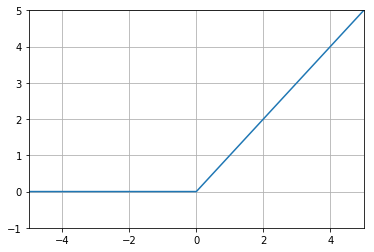

In [31]:
#x = np.arange(-10, 11)
x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

print(x)
   
plt.plot(x, relu(x))

plt.xlim(-5, 5)
plt.ylim(-1, 5)
plt.grid(True)

plt.show()

In [32]:
@interact(x=widgets.IntSlider(min=-9,max=10,step=1,value=0))
def aktywacja(x):
    print(f'reLU: {relu(x)}')

interactive(children=(IntSlider(value=0, description='x', max=10, min=-9), Output()), _dom_classes=('widget-in…

<img src="network.png" />

In [36]:
# nasze dane wejściowe
x = 1
y = 0

### Wagi dla naszej sieci

In [47]:
# wstępne/losowe wagi dla naszej sieci
waga_11 = 0.2
waga_12 = -0.1
waga_21 = 0.3
waga_22 = 0.5
waga_13 = -0.2
waga_23 = 0.4

### Definiujemy działanie neuronów w warstwie ukrytej

In [48]:
#dodac math formula

def neuron_H1(x, y):
    inputs = (x * waga_11) + (y * waga_21)
    output = relu(inputs)
    return output  

In [49]:
neuron_H1(x, y)

0.2

In [50]:
def neuron_H2(x, y):
    inputs = (x * waga_21) + (y * waga_22)
    output = relu(inputs)
    return output 

### Odpowiedź sieci

In [51]:
def odpowiedz(x, y):
    neuron1 = neuron_H1(x, y)
    neuron2 = neuron_H2(x, y)
    

    return neuron1*waga_h_13 + neuron2*waga_h_23

In [52]:
odpowiedz(1, 0)

0.07999999999999999

### Przetestujmy naszą sieć

In [53]:
dane = ['0, 0', '0, 1', '1, 0', '1, 1']

@interact(string=dane)
def odp(string):
    
    a, b = string.split(',')
    x = int(a)
    y = int(b)
    return f'input: {string} odpowiedz sieci: {neuron_H1(x, y)*waga_h_13 + neuron_H2(x, y)*waga_h_23}'

interactive(children=(Dropdown(description='string', options=('0, 0', '0, 1', '1, 0', '1, 1'), value='0, 0'), …

### Sieć bardzo się stara wypaść lepiej (losowa zmiana wag)

In [54]:
def update_wag():
    global waga_11
    global waga_12 
    global waga_21 
    global waga_22 
    global waga_13 
    global waga_23 
    waga_11 += np.random.rand() * np.random.choice([1, -1]) # monożymy razy 1 lunb -1 , zeby uzyskac numery po obu stronach zera
    waga_12 += np.random.rand() * np.random.choice([1, -1])
    waga_21 += np.random.rand() * np.random.choice([1, -1])
    waga_22 += np.random.rand() * np.random.choice([1, -1])
    waga_13 += np.random.rand() * np.random.choice([1, -1])
    waga_23 += np.random.rand() * np.random.choice([1, -1])
    

In [58]:
def nauka_bez_sensu(x, y, epoki):
    for epoka in range(epoki):
        print(f'odpowiedz nr.{epoka}: {odpowiedz(x, y)}')
        update_wag()
    return f'odpowiedz końcowa: {odpowiedz(x, y)}'

In [59]:
nauka_bez_sensu(0, 1, 5)

odpowiedz nr.0: 0.0
odpowiedz nr.1: 0.0
odpowiedz nr.2: -0.0791505318869373
odpowiedz nr.3: -0.14336159224048228
odpowiedz nr.4: -0.2195381342625284


'odpowiedz końcowa: -0.1802194605142368'